In [3]:
# Library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Identity matrix

A = np.eye(5, dtype=int)
print(A)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


In [5]:
# Import training data set

data = np.loadtxt(open("ex1data1.txt", "r"), delimiter=",")
X = data[:, 0]
y = data[:, 1]
m = len(y)

In [6]:
# Plot data

def plot_data(X, y):
    plt.plot(X, y, linestyle='', marker='x', color='r', label='Training data')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

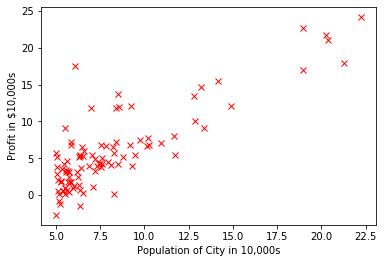

In [7]:
plt.figure()
plot_data(X, y)
plt.show()

In [8]:
# Add a column of ones to X

X = np.hstack((np.ones((m, 1)), X.reshape(m, 1)))

In [9]:
# Initialize fitting parameters with zeros

theta = np.zeros(2)

In [10]:
# Gradient descent parameters

iterations = 1500
alpha = 0.01

In [11]:
# Compute cost

def compute_cost(X, y, theta):
    m = len(y)
    J = np.sum(np.square(np.dot(X, theta)-y)) / (2.0*m)
    
    return J

In [12]:
cost = compute_cost(X, y, theta)
print ("cost = "+ str(cost))

cost = 32.072733877455676


In [13]:
# Gradient descent

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        hypothesis = np.dot(X, theta)
        error = hypothesis - y
        delta = 1./m * np.dot(X.T, error)
        theta = theta - alpha * delta

        J_history[i] = compute_cost(X, y, theta)
    
    return theta, J_history

In [14]:
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)
print ("theta = "+ str(theta))

theta = [-3.63029144  1.16636235]


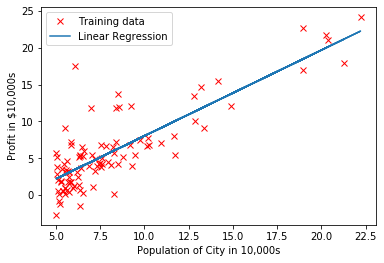

In [15]:
# Plot

plt.figure()
plot_data(X[:, 1], y)

plt.plot(X[:, 1], np.dot(X, theta), label='Linear Regression')


plt.legend(loc='upper left', numpoints=1)
plt.show()

In [16]:
# Prediction

test1 = np.array([1, 3.5])
predict1 = np.dot(test1, theta) * 10000
print("For population = 35,000, we predict a profit of = "+ str(predict1))

test2 = np.array([1, 7])
predict2 = np.dot(test2, theta) * 10000
print("For population = 70,000, we predict a profit of = "+ str(predict2))

For population = 35,000, we predict a profit of = 4519.7678677017675
For population = 70,000, we predict a profit of = 45342.45012944714


In [17]:
# Visualizing J(theta_0, theta_1)

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out j_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X, y, t)

# We need to transpose J_vals before calling plot_surface, or else the axes will be flipped.
J_vals = J_vals.T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

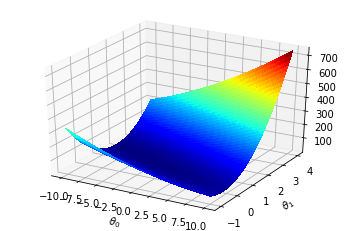

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=2, cstride=2, cmap=cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
plt.show()

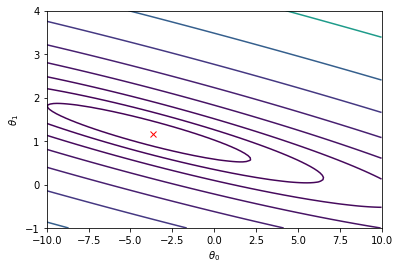

In [19]:
# Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100

plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], linestyle='', marker='x', color='r')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()


In [32]:
# Implementation by scikit-learn

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X[:, 1].reshape(-1, 1), y.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

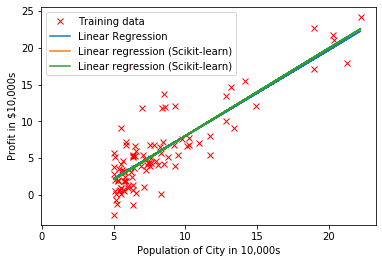

In [35]:
# Plot

plt.figure()
plot_data(X[:, 1], y)

plt.plot(X[:, 1], np.dot(X, theta), label='Linear Regression')
plt.plot(X, regr.intercept_ + regr.coef_ * X, label='Linear regression (Scikit-learn)')

plt.legend(loc='upper left', numpoints=1)
plt.show()